# Root Finding: Univariate Functions

## Numerical Methods

Students fear numerical methods because we've been training them their whole lives to solve toy problems with paper and pencil, and numerical methods have an entirely different feel.  It's unfortunate because proficiency with numerical methods opens the door to many more problems than you can find analytical solutions for, which are the norm in real engineering design.

In addition, numerical solutions are generally far easier than analytical solutions...once you get the hang of it.  They are all really based around writing some sort of function that encodes the equations you want to solve and then passing that function along with a minimum set of arguments to a Python subroutine; these are usually found in `Scipy`; here' we're working on root finding for univariate functions, so we'll add the `optimize` package from `Scipy` and alias it as `opt`.  Generally speaking, `scipy.optimize` is where we'll find root finding and optimization algorithms.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Root Finding

Let's start with the most straightforward case first - using numerical methods to find the root of a function. All we mean by root finding is that we are finding the value of the function argument(s) where the function is equal to zero. 

One key thing about learning new tools, especially numerical methods is this:

**Start by solving a problem you know the answer to**.  You can get root finding algorithms and numerical methods to converge for lots of scenarios, but there is no guarantee they are giving you the correct answer.  Start on a system you can confirm, then move onto those that you can't once you've built base proficiencies.

## Root Finding for Univariate Functions

We will start with the case of root finding with a ***univariate function***, which basically means ***a function that only has one independent variable***. For example, 

$$y = f(x) = 5x^2 + 8x - 23$$ 

We would like to find the **roots** for that function. By that, we mean the values of x where y = 0. So, when we discuss "root finding" for this equation, we are simply solving the equation below for x:

$$0 = 5x^2 + 8x - 23$$

## The Utility of Graphing your Functions


### Defining the function

In [2]:
def y(x):
    return 5*x**2 + 8*x - 23

### Numpy arrays are probably what you want...


In [3]:
xplot_ndarray = np.linspace(-4, 3, 50)

### Numpy arrays support broadcasting, so you can pass them to a function


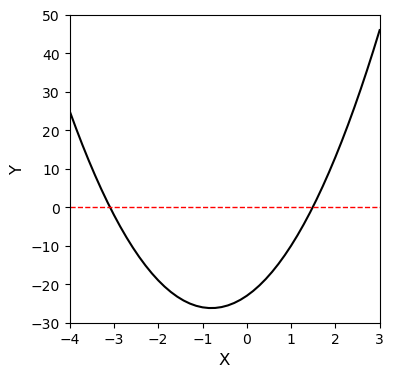

In [9]:
plt.figure(1, figsize = (4, 4))
plt.plot(xplot_ndarray, y(xplot_ndarray), color = 'black')
plt.hlines(0, -4, 3, color = 'red', linewidth = 1, linestyle = 'dashed') #Adding a y = 0
plt.xlim(min(xplot_ndarray), max(xplot_ndarray))
plt.ylim(-30, 50)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.show()

### Recall: there is an analytical solution to this equation

We know from Assignment 5 (or just recalling our math background) that we can solve this problem exactly using the quadratic equation:

$$x = \frac{-8 \pm \sqrt{8^2 - 4\cdot5\cdot-23}}{2\cdot5}$$

Solving this, we find:

$$x = 1.489 \ \ \textrm{or} \ \ x = -3.089$$

This is absolutely consistent with our graphical analysis, as it should be! For me, this is a hugely important step when learning a new method:  we are establishing the correct answer using a method we are comfortable with *before* we start writing code to implement a method that is unfamiliar too us.

### Newton-Raphson Method

A common entry point to numerical root finding is the Newton-Raphson Method. As with most numerical analysis, this is an iterative method, but it uses information about the function value and the derivative value to make more informed iterations. The general "formula" for the Newton-Raphson iteration is:

$$x_{i+1} = x_i - \frac{f(x_i)}{f^\prime(x_i)}$$


In [10]:
x = 0.0
y = -23.0
while abs(y) > 0.1:
    print(round(x,10),round(y,10))
    y  = 5*x**2 + 8*x - 23
    dy = 10*x + 8
    x  = x - y/dy
print(round(x,10),round(y,10))   

0.0 -23.0
2.875 -23.0
1.7504251701 41.328125
1.5024922836 6.3233427406
1.4891435492 0.3073535809
1.4891046288 0.0008909436


### Visualizing the progress of the iterations

Finally, for a cool visualization of how iterative root finding algorithms proceed, run this code: It will give you a graphical output of the initial guess and the updated root location after each iteration. We start it out with a rather poor initial guess (x = 10), but eventually, you'll see that it settles in and stops at the value of the true root.

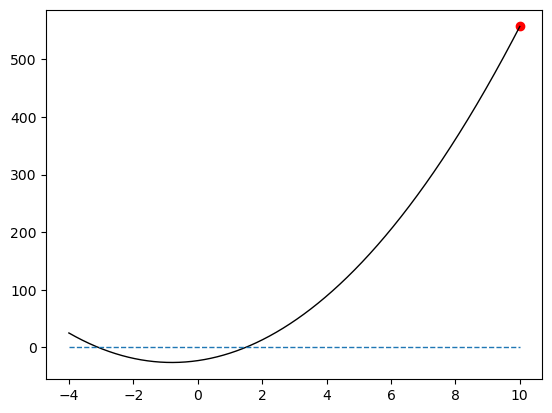

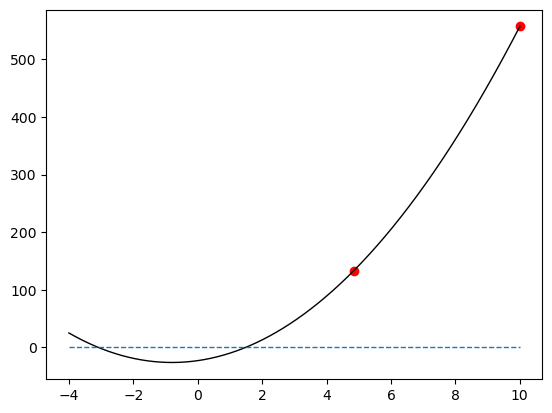

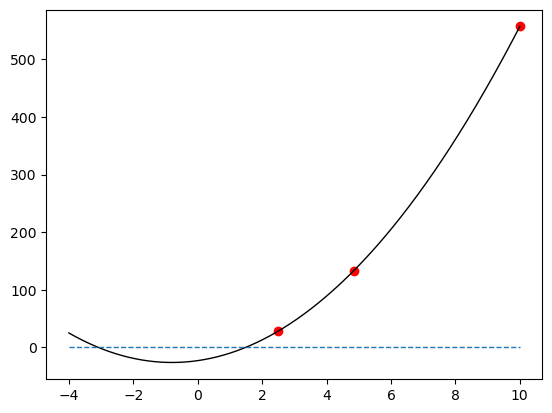

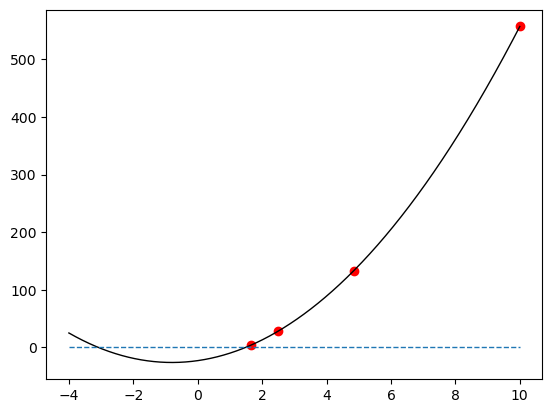

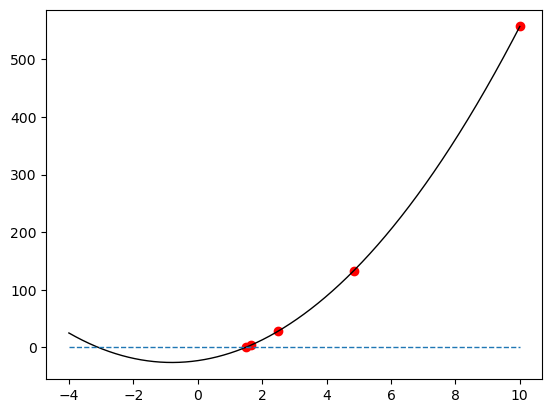

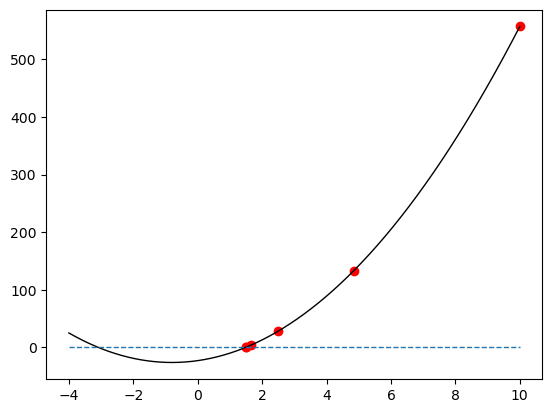

In [11]:
def y(x):
    return 5*x**2 + 8*x - 23
def dy(x):
    return 10*x + 8

xplot = np.linspace(-4,10,10000)
yplot = y(xplot)
xrange = [-4, 10]
yrange = [0, 0]

x = 10
xlist = []
ylist = []
while abs(y(x)) > 1e-8:
    xlist.append(x)
    ylist.append(y(x))
    plt.plot(xplot,yplot, color = 'black',linewidth = 1)
    plt.plot(xrange,yrange, linestyle = 'dashed', linewidth = 1)
    plt.scatter(xlist, ylist, color = 'red', marker = 'o')
    plt.show()
    x = x - y(x)/dy(x)

### Probably we should leave numerical method scripts to the professionals...

https://en.wikipedia.org/wiki/Root-finding_algorithms


## Scipy

https://docs.scipy.org/doc/scipy/reference/optimize.html


### Import `Scipy.optimize()`

In [12]:
import scipy.optimize as opt

### Methods for root finding in univariate, scalar functions


In [13]:
opt.newton(y, 0)

1.4891046284519192

In [14]:
opt.newton(y, 0, fprime = dy)

1.4891046284519194

In [15]:
opt.newton(y,0, fprime = dy, full_output = True)

(1.4891046284519194,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 6
            root: 1.4891046284519194)

In [16]:
opt.brentq(y, -2, 2, full_output = True)

(1.4891046284519196,
       converged: True
            flag: 'converged'
  function_calls: 10
      iterations: 9
            root: 1.4891046284519196)

### `opt.root_scalar()`

In [17]:
opt.root_scalar(y, x0 = 0, fprime = dy, method = 'newton')

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 1.4891046284519194

In [ ]:
opt.root_scalar(y, bracket = [-2, 2], method = 'brentq')

In [ ]:
opt.root_scalar(y, bracket = [-2, 2], method = 'toms748')

### Numerical root finding is difficult...

Now we will add some trouble to the system. The above example is really well-behaved. It is a robust 2nd order polynomial, and pretty much anything we use - graphical, quadratic, or any available numerical methods will solve it easily. Further, you can guess almost anything for your initial value of x, or provide reasonable brackets for the solver, and the algorithm will find the correct root.  This isn't always the case.  Some equations are more difficult to handle than others, and you may have to pay close attention to your initial guess or even your choice of solver.  This example is a bit contrived, but it will illustrate the point:

Consider the function:

$$g(t) = -0.74 + 0.765t + 1.1t^2 - 3.55t^3$$

When approaching a new problem that I will try to solve numerically, it is always helpful to graph it. Go ahead and do so to see if you can narrow down the range where you should look for a root.  


In [ ]:
def g(t):
    return -0.74  + 0.765*t + 1.1*t**2 - 3.55*t**3
def dg(t):
    return 0.765 + 2.2*t - 3*3.55*t**2

tset = np.linspace(-1, 1, 100)
plt.figure(1, figsize = (6, 5))
plt.plot(tset, g(tset), color = 'black')
plt.hlines(0, -4, 3, color = 'red', linewidth = 0.75, linestyle = 'dashed') #Adding a y = 0
plt.xlim(-1, 1)
plt.ylim(-5, 5)
plt.xlabel('t', fontsize = 12)
plt.ylabel('g', fontsize = 12)
plt.show()

### Solving a difficult problem with homebrew Newton-Raphson

In [ ]:
# t =  5/9
# while abs(g(t)) > 1e-6:
#     t  = t - g(t)/dg(t)
#     print(round(t,10),round(g(t),10))

In [ ]:
# opt.newton(g, 5/9, fprime = dg)

In [ ]:
opt.newton(g, 5/9)

## A great place for anonymous (lambda functions)

Numerical root finding for univariate functions is a great place to get practice with writing and using lambda functions.  For example, let's say I want to solve the function below using an initial guess of x = 10:

$$e^x = x^4 + 75.457$$

First, I need to make sure I convert this expression into a form 0 = f(x):

$$0 = x^4 - e^x + 75.457$$

In [ ]:
def k(x):
    return x**4 - np.exp(x) + 75.457 
opt.newton(k, 10)

In [ ]:
k = lambda x: x**4 - np.exp(x) + 75.457
opt.newton(k, 10)

In [ ]:
opt.newton(lambda x: x**4 - np.exp(x) + 75.457, 10)